In [1]:
from collections import defaultdict

from dbpedia import DBPedia
import utils

wrapper = DBPedia()
huric_utils = utils.HuricUtils()
language_utils = utils.LanguageUtils('en')
graph_utils = utils.GraphUtils()

['http://dbpedia.org/ontology/Book', 'http://dbpedia.org/resource/Towel', 'http://dbpedia.org/resource/Mug', 'http://dbpedia.org/resource/Bed']
types ['http://dbpedia.org/ontology/WrittenWork']
all types ['http://dbpedia.org/ontology/Work', 'http://dbpedia.org/ontology/WrittenWork']
types ['http://dbpedia.org/ontology/MusicalWork']
all types ['http://dbpedia.org/ontology/MusicalWork', 'http://dbpedia.org/ontology/Work', 'http://dbpedia.org/resource/Piece']
types ['http://dbpedia.org/ontology/SportsEvent']
all types ['http://dbpedia.org/ontology/Agent', 'http://dbpedia.org/ontology/Company', 'http://dbpedia.org/ontology/Event', 'http://dbpedia.org/ontology/Organisation', 'http://dbpedia.org/ontology/SocietalEvent', 'http://dbpedia.org/ontology/Software', 'http://dbpedia.org/ontology/SportsEvent', 'http://dbpedia.org/ontology/Work', 'http://dbpedia.org/resource/Container', 'http://dbpedia.org/resource/Cup', 'http://dbpedia.org/resource/Tool']
types ['http://dbpedia.org/ontology/MusicalWo

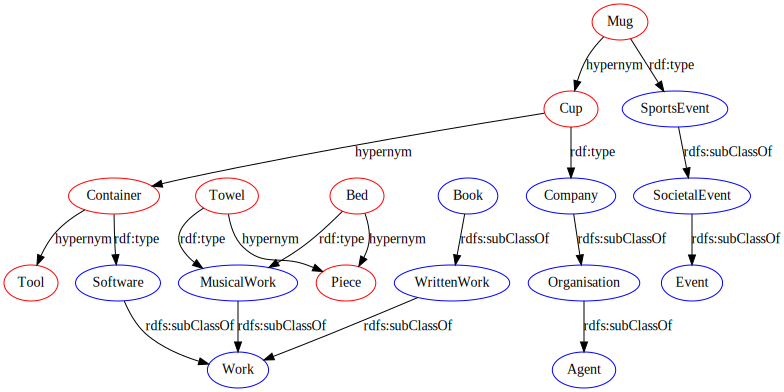

In [2]:
things = ['book', 'bath towel', 'coffee mug', 'bed']
things = [wrapper.get_id(el) for el in things]
print(things)
all_edges = set()
for w in things:
    types = wrapper.get_types(w, False)
    print('types', sorted(types))
    all_types, edges = wrapper.get_all_types(w)
    print('all types', sorted(all_types))
    #g = graph_utils.create_graph(edges)
    all_edges.update(edges)

graph_utils.create_graph(all_edges, wrapper.get_name)

In [3]:
frame_elements = huric_utils.get_frame_elements_values('Theme')
frame_lemmas = set()
for el in frame_elements:
    lemma = language_utils.semantic_head_lemmatize(el)
    #print(el, ':', lemma)
    frame_lemmas.add(lemma)
frame_lemmas = sorted(frame_lemmas)
print(frame_lemmas)

['apple', 'aspirin', 'bag', 'be', 'bed', 'beer', 'bin', 'book', 'bottle', 'box', 'bread', 'can', 'catalogue', 'cellphone', 'cereal', 'chair', 'cigarette', 'clothe', 'coat', 'coke', 'computer', 'control', 'couch', 'cup', 'cushion', 'detergent', 'envelope', 'eyeglass', 'folder', 'fork', 'fridge', 'fruit', 'garbage', 'glass', 'jacket', 'jar', 'juice', 'kettle', 'knife', 'lanyard', 'laptop', 'lot', 'magazine', 'mayo', 'message', 'milk', 'mobile', 'mug', 'mustard', 'napkin', 'newspaper', 'of', 'on', 'one', 'pack', 'pan', 'paper', 'paperback', 'pasta', 'person', 'phone', 'pillow', 'plate', 'postcard', 'pot', 'radio', 'rag', 'reading', 'remote', 'roll', 'screwdriver', 'shampoo', 'sink', 'slipper', 'soap', 'some', 'table', 'tablecloth', 'tablet', 'telephone', 'thing', 'towel', 'trash', 'tray', 'trouser', 'tub', 'vase', 'water', 'wristwatch', 'yogurt']


apple http://dbpedia.org/resource/Apple ['http://dbpedia.org/ontology/Eukaryote', 'http://dbpedia.org/ontology/Plant', 'http://dbpedia.org/ontology/Species', 'http://dbpedia.org/resource/Eukaryotes', 'http://dbpedia.org/resource/Plant', 'http://dbpedia.org/resource/Tree']
aspirin http://dbpedia.org/resource/Aspirin ['http://dbpedia.org/ontology/ChemicalSubstance', 'http://dbpedia.org/ontology/Drug', 'http://dbpedia.org/resource/Medication']
bag http://dbpedia.org/resource/Bag ['http://dbpedia.org/ontology/Software', 'http://dbpedia.org/ontology/Work', 'http://dbpedia.org/resource/Tool']
be http://dbpedia.org/resource/BE []
bed http://dbpedia.org/resource/Bed ['http://dbpedia.org/ontology/MusicalWork', 'http://dbpedia.org/ontology/Work', 'http://dbpedia.org/resource/Piece']
beer http://dbpedia.org/ontology/Beer ['http://dbpedia.org/ontology/Beverage', 'http://dbpedia.org/ontology/Food']
bin http://dbpedia.org/resource/BIN []
book http://dbpedia.org/ontology/Book ['http://dbpedia.org/ont

phone http://dbpedia.org/resource/Telephone ['http://dbpedia.org/ontology/Device', 'http://dbpedia.org/resource/Device']
pillow http://dbpedia.org/resource/Pillow ['http://dbpedia.org/ontology/Agent', 'http://dbpedia.org/ontology/Organisation', 'http://dbpedia.org/resource/Support']
plate http://dbpedia.org/resource/Plate []
postcard http://dbpedia.org/resource/Postcard ['http://dbpedia.org/ontology/MusicalWork', 'http://dbpedia.org/ontology/Work', 'http://dbpedia.org/resource/Piece']
pot http://dbpedia.org/resource/Pot []
radio http://dbpedia.org/resource/Radio ['http://dbpedia.org/resource/Use']
rag http://dbpedia.org/resource/Rag []
reading http://dbpedia.org/resource/Reading []
remote http://dbpedia.org/resource/Remote []
roll http://dbpedia.org/resource/Roll []
screwdriver http://dbpedia.org/resource/Screwdriver ['http://dbpedia.org/ontology/Software', 'http://dbpedia.org/ontology/Work', 'http://dbpedia.org/resource/Tool']
shampoo http://dbpedia.org/resource/Shampoo ['http://dbped

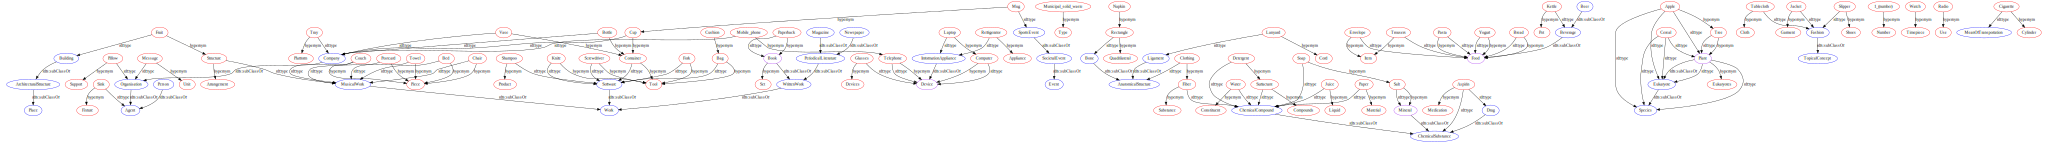

In [4]:
all_hypernyms = defaultdict(lambda: 0)
all_edges = set()
for w in frame_lemmas:
    id = wrapper.get_id(w)
    hypernyms, edges = wrapper.get_all_types(id, disambiguate=False)
    print(w, id, sorted(hypernyms))
    for w in hypernyms:
        all_hypernyms[w] += 1
    all_edges.update(edges)

graph_utils.create_graph(all_edges, wrapper.get_name)

In [5]:
sorted_hypernyms = sorted([(k,v) for k,v in all_hypernyms.items()], key=lambda el: el[1], reverse=True)
print(sorted_hypernyms)

[('http://dbpedia.org/ontology/Work', 20), ('http://dbpedia.org/ontology/Software', 10), ('http://dbpedia.org/ontology/Agent', 10), ('http://dbpedia.org/resource/Tool', 9), ('http://dbpedia.org/ontology/Organisation', 8), ('http://dbpedia.org/ontology/ChemicalSubstance', 7), ('http://dbpedia.org/ontology/Food', 7), ('http://dbpedia.org/ontology/Device', 7), ('http://dbpedia.org/ontology/MusicalWork', 6), ('http://dbpedia.org/ontology/Company', 6), ('http://dbpedia.org/ontology/ChemicalCompound', 6), ('http://dbpedia.org/resource/Piece', 5), ('http://dbpedia.org/resource/Device', 5), ('http://dbpedia.org/ontology/WrittenWork', 4), ('http://dbpedia.org/resource/Container', 4), ('http://dbpedia.org/resource/Food', 3), ('http://dbpedia.org/ontology/AnatomicalStructure', 3), ('http://dbpedia.org/ontology/TopicalConcept', 3), ('http://dbpedia.org/ontology/Fashion', 3), ('http://dbpedia.org/ontology/Eukaryote', 2), ('http://dbpedia.org/ontology/Plant', 2), ('http://dbpedia.org/ontology/Specie